In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
sns.set(style='whitegrid')
file_path = 'data/Titanic.csv'
df = pd.read_csv(file_path)

# --------------------------------
# INTIAL DATA EXPLORATION
# --------------------------------

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.shape

(891, 12)

In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [41]:
print(df.isnull().sum())
print("")
print(df.describe().T)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp

In [42]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [43]:
categorical_var = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_var = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables", categorical_var)
print("Numerical Variables", numerical_var)

Categorical Variables ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Variables ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# --------------------------------
# UNIVARIATE ANALYSIS
# --------------------------------

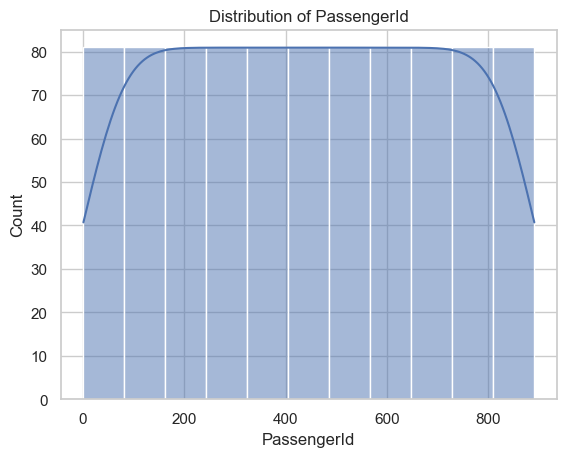

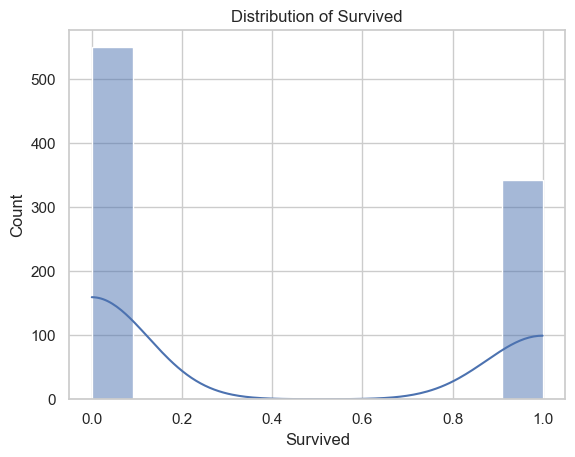

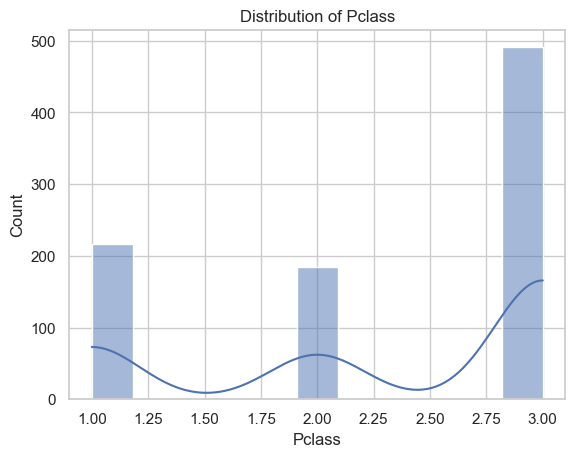

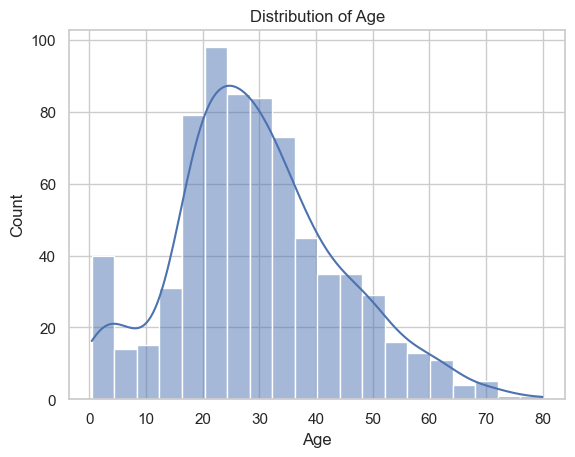

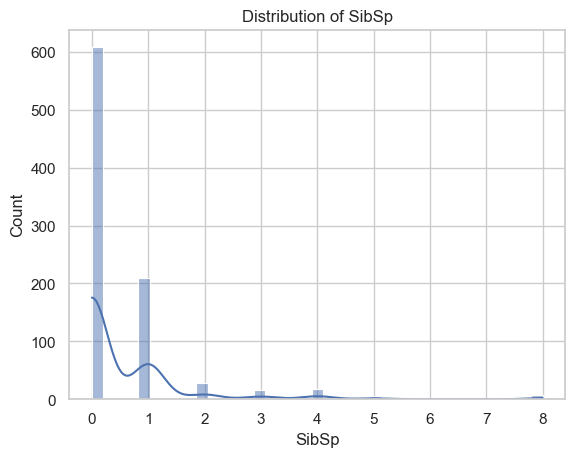

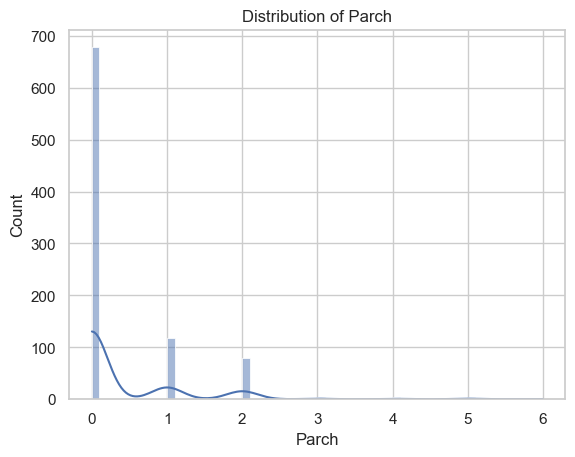

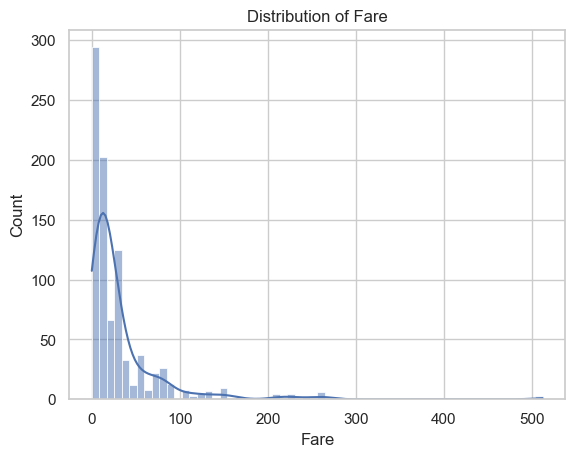

In [44]:
for var in numerical_var:
    sns.histplot(df[var].dropna(), kde=True)
    plt.title(f"Distribution of {var}")
    plt.show()

### Feature Insights

1. **PassengerId**
   - Uniform distribution across all IDs.
   - Serves as a **unique identifier**; no analytical value.  
   - **Recommendation:** Drop this feature.

2. **Survived**
   - Binary variable:  
     - `0`: Non-survivors (majority)  
     - `1`: Survivors (minority)

3. **Pclass**
   - Most passengers traveled in **3rd class**, followed by **1st** and **2nd class**.

4. **Age**
   - Approximately **normal distribution**, peaking around **20–30 years**.  
   - **Missing values:** 177 out of 891 (~20%).

5. **SibSp** (Siblings/Spouses aboard)
   - Majority of passengers: `0` siblings/spouses.  
   - Few passengers: More than `3` siblings/spouses.

6. **Parch** (Parents/Children aboard)
   - Majority of passengers: `0` parents/children.  
   - Few passengers: More than `2` parents/children.

7. **Fare**
   - **Right-skewed distribution**; most fares are at the **lower end**.  
   - Presence of **outliers** with very high fares.


In [45]:
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [46]:
numerical_var.remove("PassengerId")
numerical_var

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

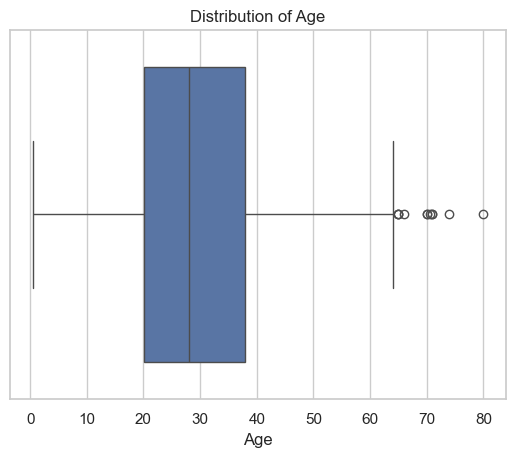

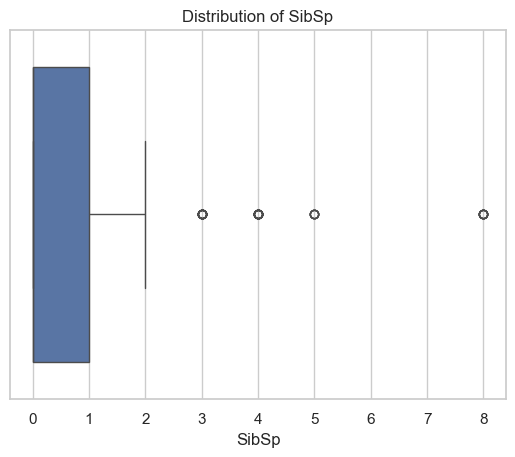

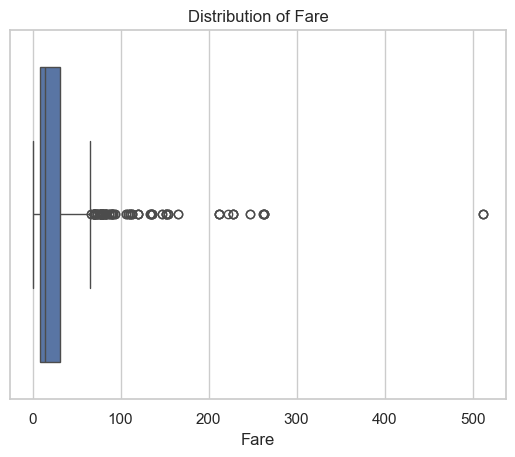

In [47]:
for var in ["Age", "SibSp", "Fare"]:
    sns.boxplot(x=df[var].dropna())
    plt.title(f"Distribution of {var}")
    plt.show()

### Detailed Feature Analysis

1. **Age**  
   - **Distribution:**  
     - Majority of passengers: **20–40 years old**.  
     - **Median age:** ~28 years.  
     - Several **outliers** with ages extending up to **80 years**.  
   - **Implications:**  
     - The passenger population was relatively **young**, with a small number of significantly older individuals.  

---

2. **SibSp (Siblings/Spouses Aboard)**  
   - **Distribution:**  
     - Majority: **0 siblings/spouses** aboard.  
     - **Median:** 0.  
     - A few **outliers** with up to **8 siblings/spouses**.  
   - **Implications:**  
     - Most passengers traveled **alone or with one companion**, suggesting smaller family units or solo travelers.  

---

3. **Fare**  
   - **Distribution:**  
     - Most fares: **below 100**.  
     - **Median fare:** relatively low.  
     - Several **outliers** with fares exceeding **500**.  
   - **Implications:**  
     - The majority of passengers paid **lower fares**, while a few paid **significantly more**, likely for **first-class accommodations**.  


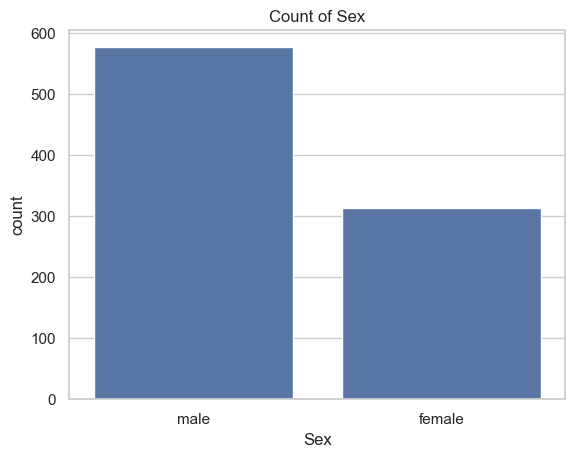

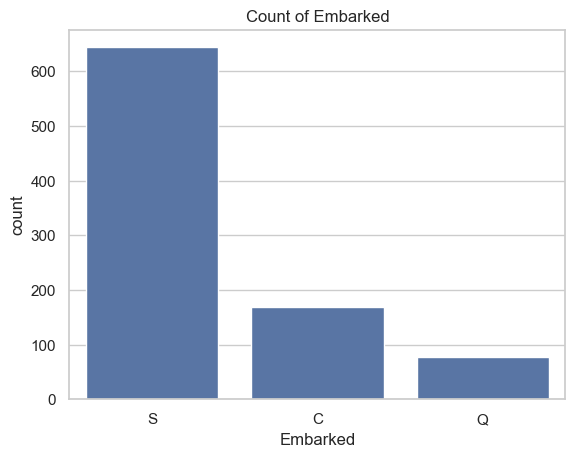

In [48]:
categorical_var = df.select_dtypes(include=["object", "category"]).columns.tolist()
for var in categorical_var:
    sns.countplot(x=var, data=df)
    plt.title(f"Count of {var}")
    plt.show()

### Categorical Feature Analysis  

1. **Sex**  
   - **Distribution:**  
     - **Male:** ~65% of passengers.  
     - **Female:** ~35% of passengers.  
   - **Implications:**  
     - The dataset is **male-dominated**, which may influence survival rate patterns.  

---

2. **Embarked**  
   - **Distribution:**  
     - **Southampton (S):** ~72% (majority of passengers).  
     - **Cherbourg (C):** ~19%.  
     - **Queenstown (Q):** ~9%.  
   - **Implications:**  
     - Southampton was the **main boarding point**, while Queenstown had the fewest passengers.  


# --------------------------------
# BIVARIATE ANALYSIS
# --------------------------------

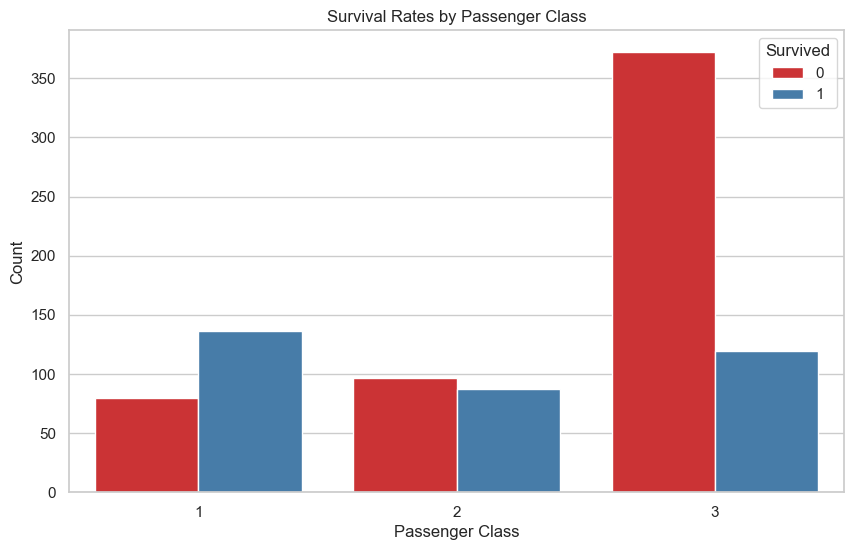

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

### Survival by Passenger Class

- **1st Class:** Highest survival rate, with **more survivors than non-survivors**.  
- **2nd Class:** **More balanced distribution** of survivors and non-survivors.  
- **3rd Class:** Lowest survival rate, with **significantly more non-survivors than survivors**.  
- **Insight:** Passenger class was a **strong indicator of survival likelihood**, reflecting socio-economic status and access to lifeboats.  


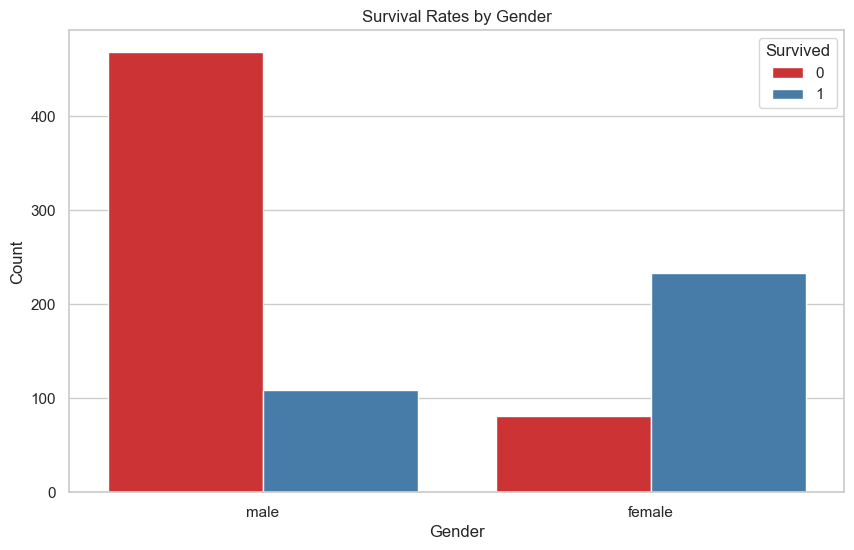

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

### Survival by Gender

- **Female Passengers:** Had a **significantly higher survival rate**, with **more females surviving than not surviving**.  
- **Male Passengers:** A **large majority did not survive**, showing a **strong gender disparity** in survival outcomes.  
- **Insight:** Gender played a **major role in survival**, likely influenced by evacuation priorities ("women and children first").  


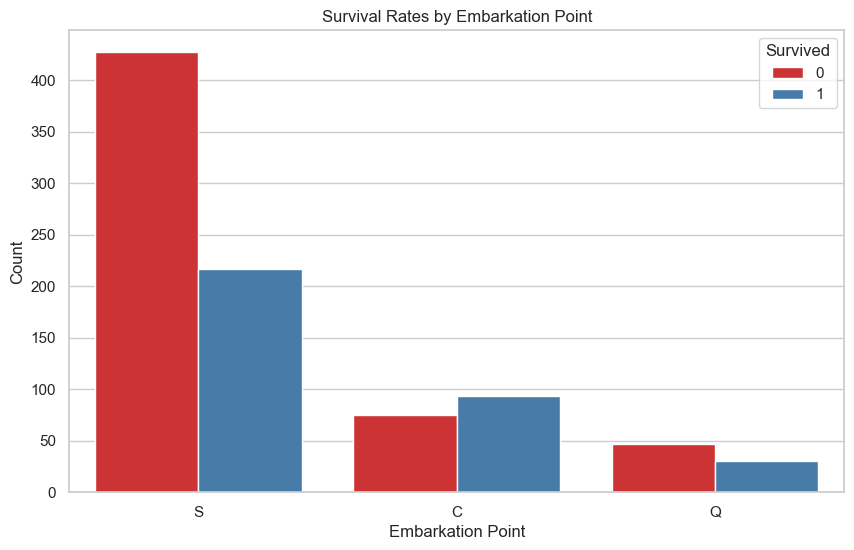

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set1')
plt.title('Survival Rates by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

### Survival by Embarkation Point

- **Southampton (S):** The majority of passengers embarked here, with **more non-survivors than survivors**.  
- **Cherbourg (C):** Passengers embarking here showed a **higher survival rate**, with **more survivors than non-survivors**.  
- **Queenstown (Q):** Had the **fewest passengers**, and **non-survivors outnumbered survivors**.  
- **Insight:** The **embarkation point** appears to have influenced **survival likelihood**, possibly reflecting **class and socio-economic differences** among passengers from each port.  


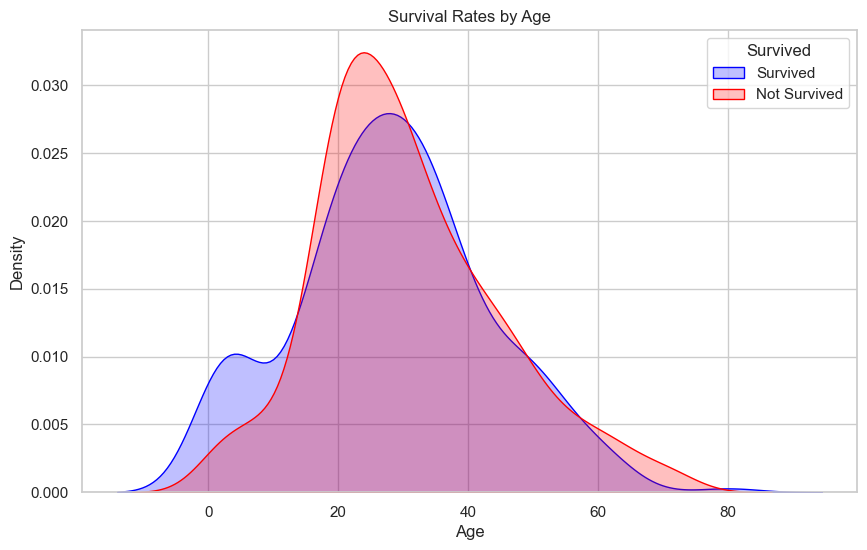

In [53]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'].dropna(), fill=True, label='Survived', color='blue')
sns.kdeplot(df[df['Survived'] == 0]['Age'].dropna(), fill=True, label='Not Survived', color='red')
plt.title('Survival Rates by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived')
plt.show()

### Density Plot Insights (Age vs. Survival)

- The plot compares **age distributions** for passengers who **survived** vs. those who **did not**.  
- The **peak age** for both groups is around **20–30 years**, indicating a high concentration of passengers in this age range.  
- **Survival rates are higher for younger children**, as shown by the **blue curve** being higher than the red curve at ages below 10.  
- For ages **20–50**, the curves **overlap significantly**, suggesting similar survival chances for adults in this range.  
- Beyond **age 50**, both curves **taper off sharply**, reflecting fewer elderly passengers overall.  


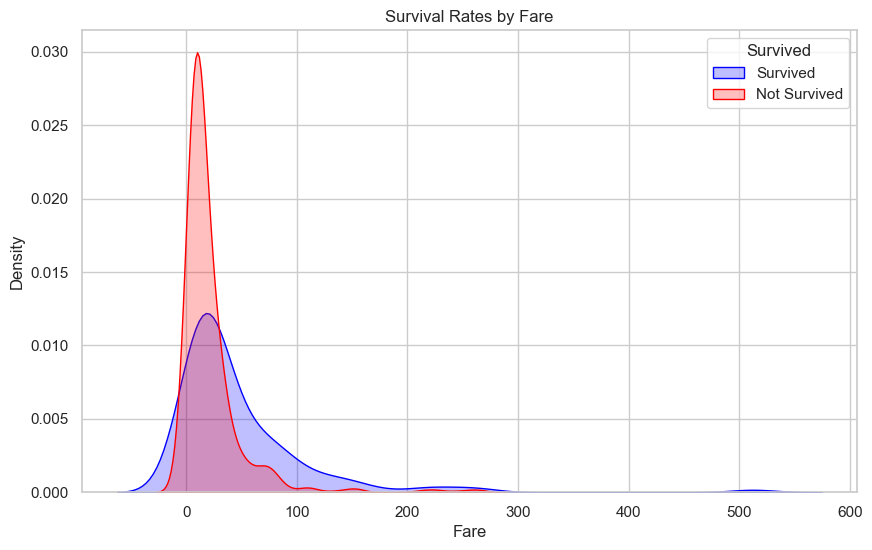

In [54]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Fare'], fill=True, label='Survived', color='blue')
sns.kdeplot(df[df['Survived'] == 0]['Fare'], fill=True, label='Not Survived', color='red')
plt.title('Survival Rates by Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(title='Survived')
plt.show()

### Density Plot Insights (Fare vs. Survival)

- The density plot compares **fare distributions** for passengers who **survived** vs. those who **did not**.  
- Passengers paying **lower fares (below 50)** show a **higher density of non-survivors**, represented by the **red peak**.  
- Passengers who paid **higher fares** show a **higher survival rate**, as seen by the **blue curve** dominating at higher fare values.  
- This suggests a **positive correlation between fare and survival**, likely tied to **passenger class**—wealthier passengers (higher fares) had **better survival chances**.  


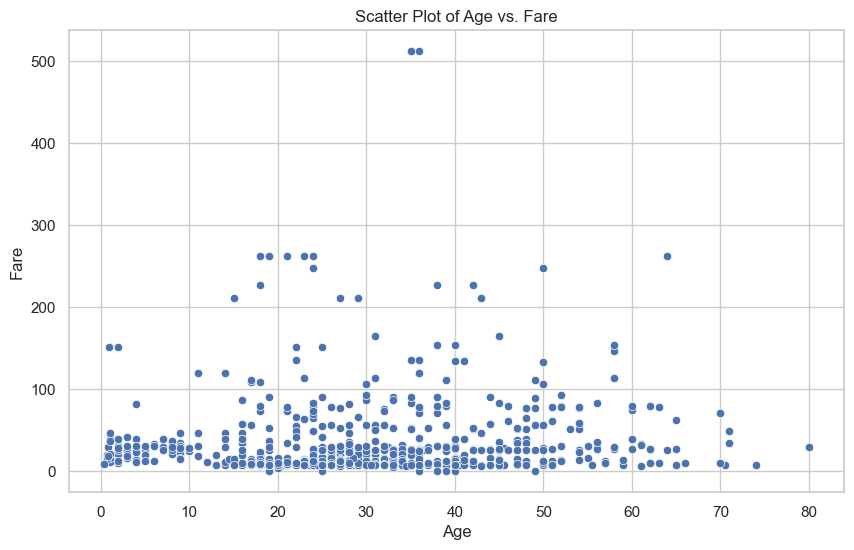

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


### Scatter Plot Insights (Age vs. Fare)

- The scatter plot shows the relationship between **passengers' ages** and the **fares they paid**.  
- The **majority of passengers**, regardless of age, paid fares **below 100**.  
- A few **outliers** indicate significantly higher fares, with some fares **exceeding 500**.  


# --------------------------------
# MULTIVARIATE ANALYSIS
# --------------------------------

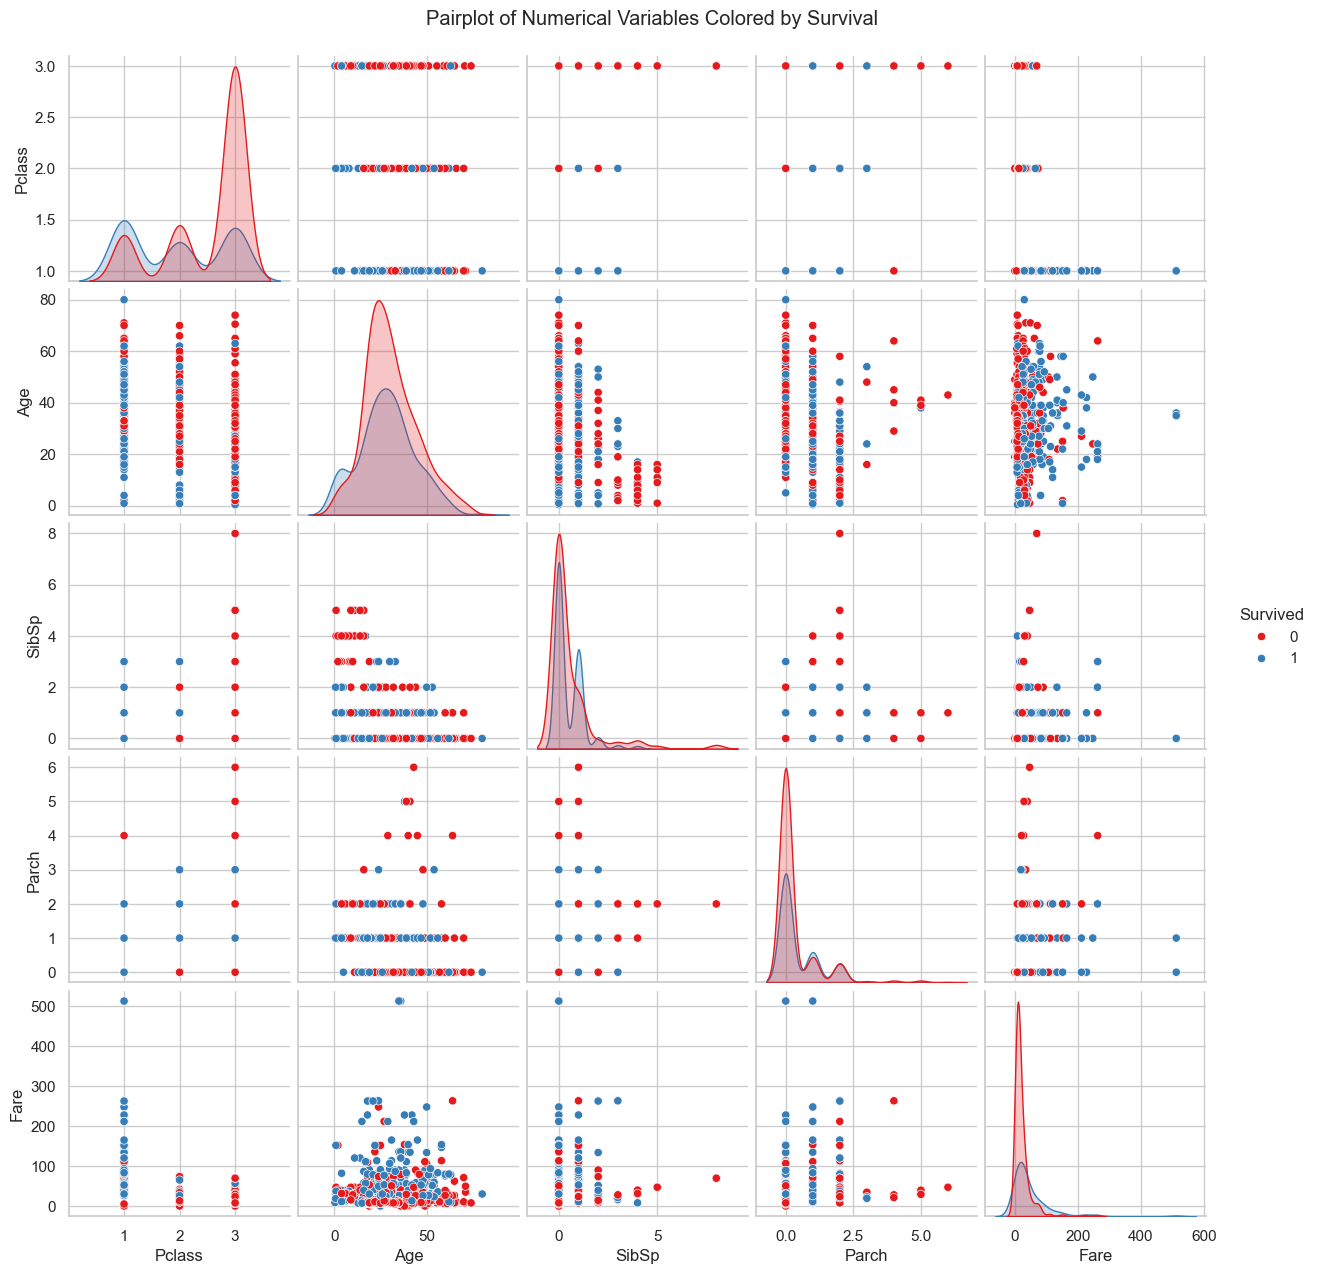

In [57]:
sns.pairplot(df, hue='Survived', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables Colored by Survival', y=1.02)
plt.show()

### Multivariate Pairplot Insights 

---

#### 1. Passenger Class (Pclass) vs. Other Variables
- **Pclass vs. Age:**  
  - 1st class passengers tend to be **older**.  
  - 3rd class has a **higher density of younger passengers**.  
- **Pclass vs. SibSp:**  
  - 1st class passengers usually have **fewer siblings/spouses** aboard.  
  - 3rd class shows **more variability** in family size.  
- **Pclass vs. Parch:**  
  - 1st class passengers generally travel with **fewer parents/children**.  
  - 3rd class shows **greater spread** in family presence.  
- **Pclass vs. Fare:**  
  - Clear trend: **1st class = higher fares**.  
  - Few 3rd class passengers paid **high fares**.

---

#### 2. Age vs. Other Variables
- **Age vs. SibSp:**  
  - **Children** are more likely to have **higher SibSp** values (larger families).  
  - **Older passengers** tend to travel alone or with fewer companions.  
- **Age vs. Parch:**  
  - Similar trend: **younger passengers** often traveled with **parents or children**.  
- **Age vs. Fare:**  
  - **High fares** span a **wide age range**, with many concentrated among **young adults**.

---

#### 3. SibSp vs. Other Variables
- **SibSp vs. Parch:**  
  - Higher **SibSp** often corresponds to **higher Parch**, indicating **large family groups**.  
- **SibSp vs. Fare:**  
  - Passengers with **0–1 SibSp** paid a **wide range of fares**.  
  - Families with **more siblings/spouses** generally paid **lower fares**.

---

#### 4. Parch vs. Other Variables
- **Parch vs. Fare:**  
  - Higher **Parch** values often link to **lower fares**, though exceptions exist.

---

#### 5. Fare vs. All Variables
- **Fare and Survival:**  
  - **Higher fares** (mostly 1st class) strongly correlate with **higher survival rates**.  
  - Blue points (survivors) cluster at **upper fare values**.


### Survival Analysis 

---

#### Survival by Pclass
- **1st class passengers** had **much higher survival rates**.  
- Clear class disparity: **3rd class** passengers had the **lowest survival**.

---

#### Survival by Age
- **Children** had **higher survival rates**.  
- Among adults, **age alone** was **not a strong survival predictor**.

---

#### Survival by SibSp and Parch
- **Large families** show **mixed outcomes**.  
- **Solo travelers or small families** (especially in lower classes) had **lower survival rates**.

---

#### Survival by Fare
- **Higher fares** correlate strongly with **higher survival rates**.  
- This likely reflects the advantage of **wealth and class (1st class cabins)**.

---

### Interaction Insights

- **Age & Fare with Survival:**  
  - **Young, wealthy children** (1st class) had **exceptionally high survival**.  

- **Family Size (SibSp & Parch) with Survival:**  
  - **Large families in 3rd class** faced **lower survival chances**.  
  - **Small families/solo passengers in 1st class** fared **much better**.

- **Complex Interactions:**  
  - Survival is influenced by a **combination of wealth, class, and family size**.  
  - **Wealthier individuals** and those in **smaller family groups** had **significant survival advantages**.


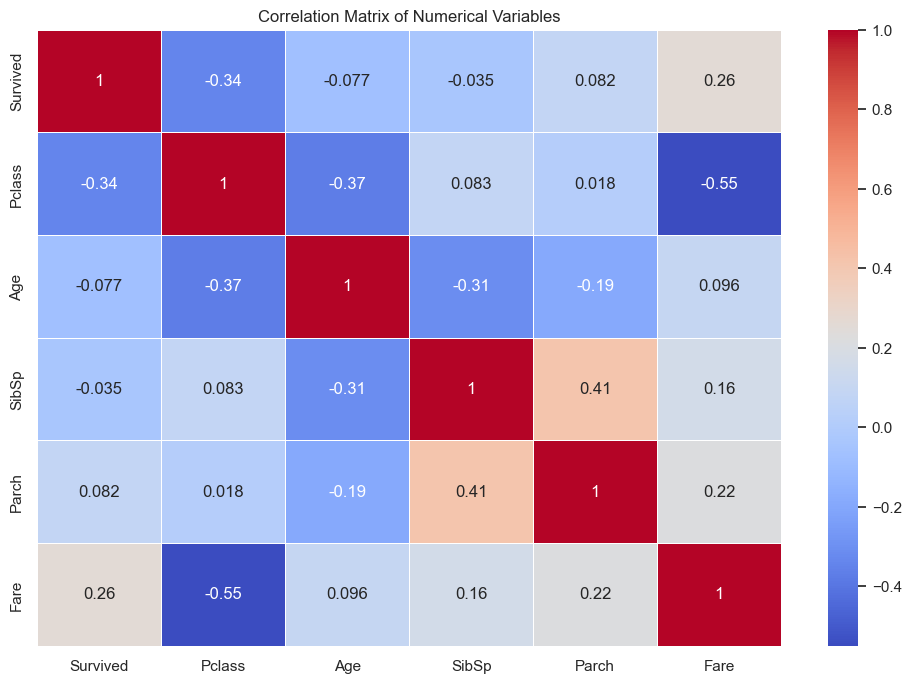

In [58]:
# Heatmap for showing correlation matrix of numerical variables
plt.figure(figsize=(12, 8))
numerical_df = df[numerical_var]  # Use only numerical variables
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Correlation Analysis 

- **SibSp & Parch (0.41):**  
  There is a **moderate positive correlation** between the number of siblings/spouses and parents/children aboard,  
  indicating that **larger family groups often traveled together**.

- **Fare Correlations (≤ 0.22):**  
  The correlation between **Fare** and other variables is **relatively low**,  
  with the **highest being 0.22 with Parch**.

- **Age Correlations:**  
  **Age** shows a **slight negative correlation** with SibSp and Parch,  
  suggesting that **younger passengers tended to travel with more family members**.

- **Overall Insight:**  
  There are **no extremely strong correlations** among the numerical variables.  
  This indicates that each feature provides **unique information** about the passengers.


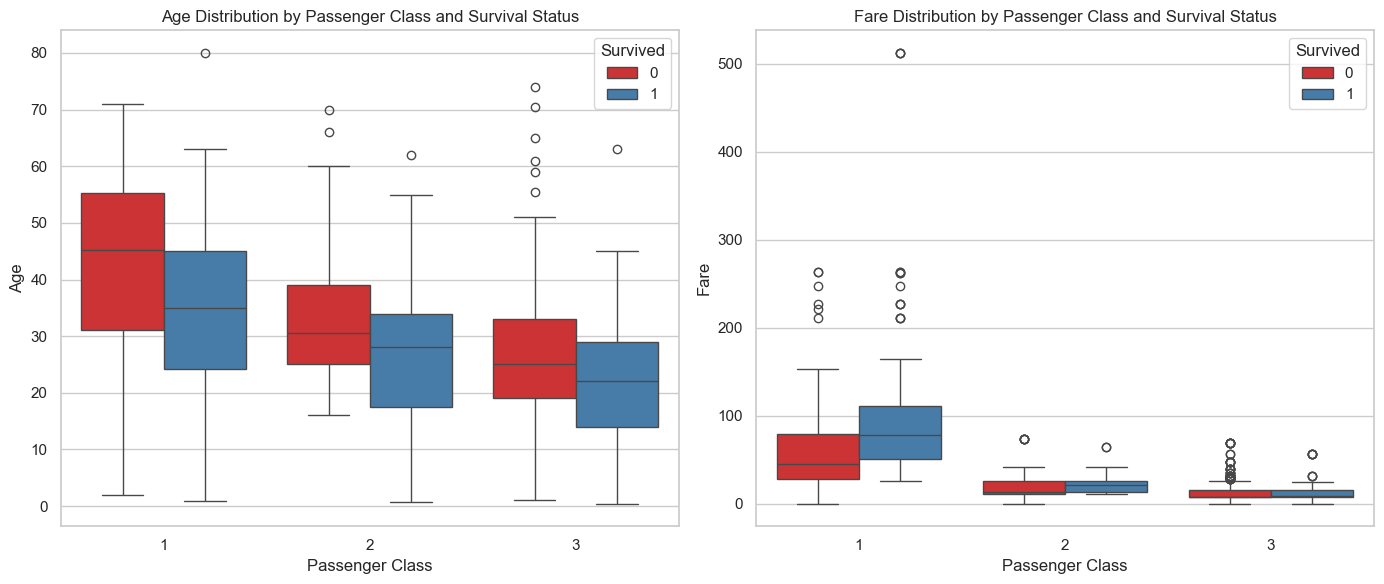

In [59]:
plt.figure(figsize=(14, 6))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df, palette='Set1')
plt.title('Age Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='Set1')
plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()

### Boxplot Insights 

- **1st Class:**  
  - Younger passengers had a **higher survival rate**.  
  - Passengers who paid **higher fares** were more likely to survive.  

- **2nd Class:**  
  - **Fare and age distributions** were more balanced between survivors and non-survivors,  
    indicating less disparity in survival chances compared to 1st class.

- **3rd Class:**  
  - Younger passengers were more prevalent, but  
  - **Fare differences** between survivors and non-survivors were minimal.  
  - This reflects **lower overall fares and survival rates** compared to higher classes.
